In [1]:
import pandas as pd

In [2]:
pref = pd.read_csv("COVID-19-jp/nhk_news_covid19_prefectures_daily_data.csv")
pref["日付"] = pd.to_datetime(pref["日付"] )
print(len(pref))
pref.tail()

22842


,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計
22837,2021-05-11,47,沖縄県,132,13252,0,139
22838,2021-05-12,47,沖縄県,109,13361,1,140
22839,2021-05-13,47,沖縄県,126,13487,0,140
22840,2021-05-14,47,沖縄県,134,13621,0,140
22841,2021-05-15,47,沖縄県,160,13781,1,141


In [3]:
all_jp = pref.groupby(["都道府県名"], as_index=False).sum()
del all_jp["各地の感染者数_累計"]
del all_jp["各地の死者数_累計"]
#all_jp = all_jp.rename(columns={"各地の感染者数合計":"各地の感染者数_1日ごとの発表数"})
all_jp = all_jp.rename(columns={"各地の感染者数_1日ごとの発表数":"各地の感染者数合計"})
all_jp = all_jp.rename(columns={"各地の死者数_1日ごとの発表数":"各地の死者数合計"})
all_jp.tail()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計
42,静岡県,10692,7385,130
43,香川県,17982,1789,24
44,高知県,18954,1148,20
45,鳥取県,15066,434,2
46,鹿児島県,22356,2842,28


## 都道府県ごとの最新データを付与

In [4]:
# 直近１週間の感染者数
pref["直近1週間の感染者数"] = pref["各地の感染者数_1日ごとの発表数"].rolling(7).sum()
pref.tail(7)

,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計,直近1週間の感染者数
22835,2021-05-09,47,沖縄県,103,13084,0,138,470.0
22836,2021-05-10,47,沖縄県,36,13120,1,139,449.0
22837,2021-05-11,47,沖縄県,132,13252,0,139,548.0
22838,2021-05-12,47,沖縄県,109,13361,1,140,594.0
22839,2021-05-13,47,沖縄県,126,13487,0,140,681.0
22840,2021-05-14,47,沖縄県,134,13621,0,140,733.0
22841,2021-05-15,47,沖縄県,160,13781,1,141,800.0


In [5]:
latest = pref.loc[pref["日付"]==pref["日付"].max()][["都道府県名","直近1週間の感染者数"]]
latest.head()

,都道府県名,直近1週間の感染者数
485,北海道,3736.0
971,青森県,174.0
1457,岩手県,130.0
1943,宮城県,215.0
2429,秋田県,103.0


In [6]:
all_jp = pd.merge(all_jp, latest, on="都道府県名")
all_jp.head()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数
0,三重県,11664,4424,96,333.0
1,京都府,12636,14536,196,978.0
2,佐賀県,19926,2199,15,288.0
3,兵庫県,13608,37284,855,2368.0
4,北海道,486,29911,929,3736.0


## 人口データを付与

In [7]:
pop = pd.read_excel("COVID-19-jp/2001stjin.xls",header=3)[["Unnamed: 1","計"]]
pop.rename(columns={"Unnamed: 1":"都道府県名"},inplace=True)
pop.rename(columns={"計":"人口"},inplace=True)
pop = pop.loc[pop["都道府県名"]!="合計"].reset_index(drop=True)

In [8]:
all_jp = pd.merge(all_jp, pop, on="都道府県名", how="left")
all_jp.head()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,人口
0,三重県,11664,4424,96,333.0,1813859
1,京都府,12636,14536,196,978.0,2545899
2,佐賀県,19926,2199,15,288.0,823810
3,兵庫県,13608,37284,855,2368.0,5549568
4,北海道,486,29911,929,3736.0,5267762


## 人口当たりの感染者数

In [9]:
all_jp["１万人当たりの感染者数"] = all_jp["各地の感染者数合計"] / (all_jp["人口"] / 10000)
all_jp["10万人当たりの感染者数"] = all_jp["各地の感染者数合計"] / (all_jp["人口"] / 100000)
all_jp["直近1週間の10万人当たりの感染者数"] = all_jp["直近1週間の感染者数"] / (all_jp["人口"] / 100000)
all_jp.sort_values("都道府県コード")

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
4,北海道,486,29911,929,3736.0,5267762,56.781229,567.812289,70.921959
41,青森県,972,1942,27,174.0,1275783,15.222024,152.220244,13.638683
19,岩手県,1458,1206,39,130.0,1235517,9.761096,97.610960,10.521911
11,宮城県,1944,8522,75,215.0,2292385,37.175256,371.752563,9.378878
36,秋田県,2430,684,9,103.0,985416,6.941231,69.412309,10.452438
15,山形県,2916,1702,37,111.0,1082296,15.725827,157.258273,10.255974
35,福島県,3402,4214,130,426.0,1881981,22.391299,223.912994,22.635723
38,茨城県,3888,8946,137,421.0,2921436,30.621927,306.219270,14.410721
27,栃木県,4374,5825,74,254.0,1965516,29.635984,296.359836,12.922815
37,群馬県,4860,7152,114,536.0,1969439,36.314910,363.149100,27.215872


## 感染者数

### 平均値、中央値

In [10]:
all_jp["各地の感染者数合計"].describe()

count        47.000000
mean      14393.723404
std       27307.267141
min         424.000000
25%        2070.500000
50%        4311.000000
75%        8734.000000
max      151697.000000
Name: 各地の感染者数合計, dtype: float64

### TOP 10

In [11]:
all_jp.sort_values("各地の感染者数合計", ascending=False).reset_index(drop=True).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
0,東京都,6318,151697,1951,6135.0,13834925,109.647866,1096.478658,44.344295
1,大阪府,13122,94155,1943,5486.0,8849635,106.394219,1063.942185,61.991257
2,神奈川県,6804,57576,854,2176.0,9209442,62.518446,625.184457,23.627924
3,埼玉県,5346,41337,762,1763.0,7390054,55.935992,559.359918,23.856389
4,愛知県,11178,40250,669,3971.0,7575530,53.131596,531.315961,52.418775
5,兵庫県,13608,37284,855,2368.0,5549568,67.183608,671.836078,42.669988
6,千葉県,5832,35336,655,1103.0,6319772,55.913410,559.134095,17.453161
7,北海道,486,29911,929,3736.0,5267762,56.781229,567.812289,70.921959
8,福岡県,19440,29737,390,3434.0,5129841,57.968658,579.686583,66.941646
9,京都府,12636,14536,196,978.0,2545899,57.095745,570.957450,38.414721


## １万人あたりの感染者数

### 平均値、中央値

In [12]:
all_jp["１万人当たりの感染者数"].describe()

count     47.000000
mean      33.743106
std       24.445293
min        6.241499
25%       17.425790
50%       25.894465
75%       45.153426
max      109.647866
Name: １万人当たりの感染者数, dtype: float64

## 直近１週間の１０万人あたりの感染者数

In [13]:
all_jp.sort_values(["直近1週間の10万人当たりの感染者数"],ascending=False).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
4,北海道,486,29911,929,3736.0,5267762,56.781229,567.812289,70.921959
34,福岡県,19440,29737,390,3434.0,5129841,57.968658,579.686583,66.941646
9,大阪府,13122,94155,1943,5486.0,8849635,106.394219,1063.942185,61.991257
18,岡山県,16038,5965,70,1129.0,1903627,31.334920,313.349201,59.307837
28,沖縄県,22842,13781,141,800.0,1481547,93.017636,930.176363,53.997612
24,愛知県,11178,40250,669,3971.0,7575530,53.131596,531.315961,52.418775
21,広島県,16524,8184,113,1422.0,2826858,28.950871,289.508705,50.303199
17,岐阜県,10206,7322,143,913.0,2032490,36.024777,360.247775,44.920270
8,大分県,21384,2830,33,513.0,1151229,24.582425,245.824245,44.561073
26,東京都,6318,151697,1951,6135.0,13834925,109.647866,1096.478658,44.344295


## グラフ化

In [14]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

In [15]:
all_jp_desc = all_jp.sort_values(["各地の感染者数合計"],ascending=False)
all_jp_desc_10k = all_jp.sort_values(["１万人当たりの感染者数"],ascending=False)
all_jp_desc_100k = all_jp.sort_values(["直近1週間の10万人当たりの感染者数"],ascending=False)

<IPython.core.display.Javascript object>


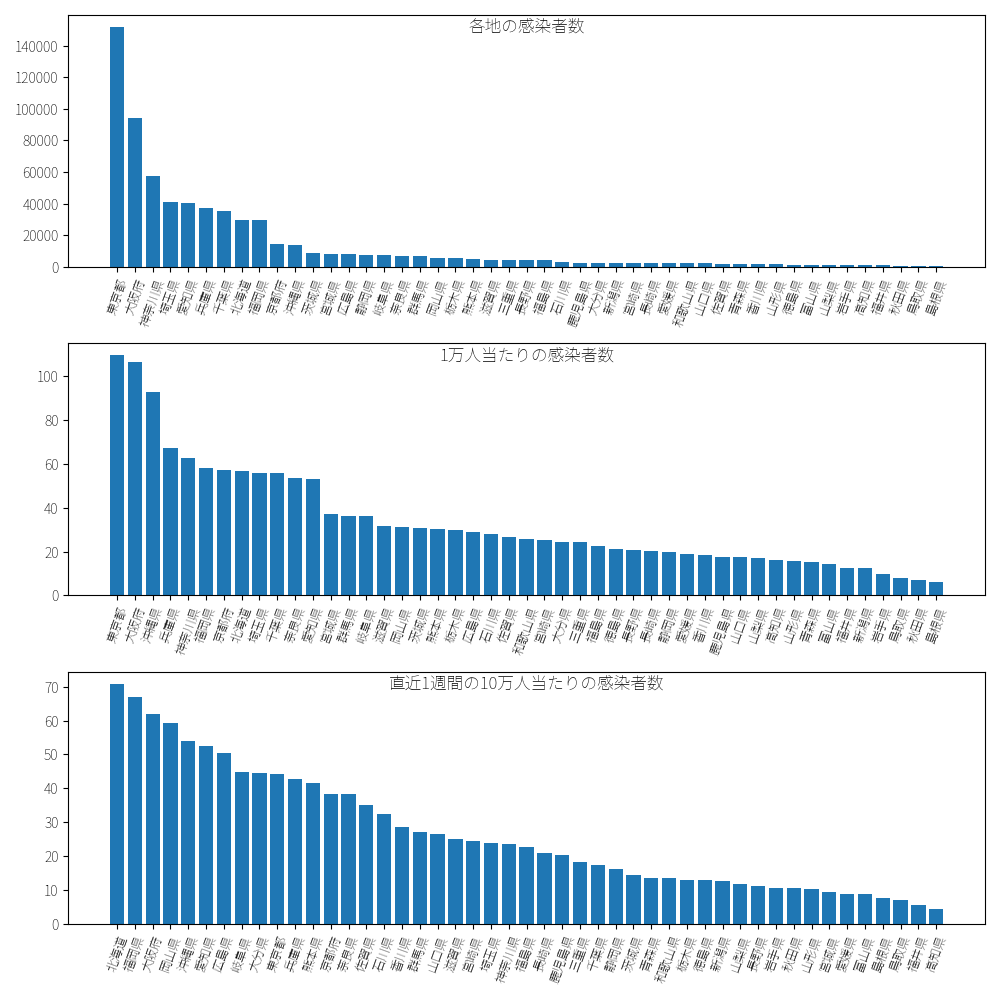

In [16]:
fig = plt.figure(figsize=(10,10))
plt.subplot(3,1,1) # (rows, columns, panel number)
plt.xticks(rotation="70",fontsize=9)
plt.bar(all_jp_desc["都道府県名"], all_jp_desc["各地の感染者数合計"])
plt.title("各地の感染者数", y=0.9)

plt.subplot(3,1,2) # (rows, columns, panel number)
plt.xticks(rotation="70",fontsize=9)
plt.bar(all_jp_desc_10k["都道府県名"], all_jp_desc_10k["１万人当たりの感染者数"])
plt.title("1万人当たりの感染者数",y=0.9)


plt.subplot(3,1,3) # (rows, columns, panel number)
plt.xticks(rotation="70",fontsize=9)
plt.bar(all_jp_desc_100k["都道府県名"], all_jp_desc_100k["直近1週間の10万人当たりの感染者数"])
plt.title("直近1週間の10万人当たりの感染者数",y=0.9)

fig.tight_layout()


## 度数分布表

In [17]:
import numpy as np
data = np.array(all_jp["各地の感染者数合計"])
 
# ヒストグラム
hist, bin_edges = np.histogram(data, bins=8)

print(hist)
print(bin_edges)

[38  4  2  1  1  0  0  1]
[   424.     19333.125  38242.25   57151.375  76060.5    94969.625
 113878.75  132787.875 151697.   ]


## ヒストグラム

<IPython.core.display.Javascript object>


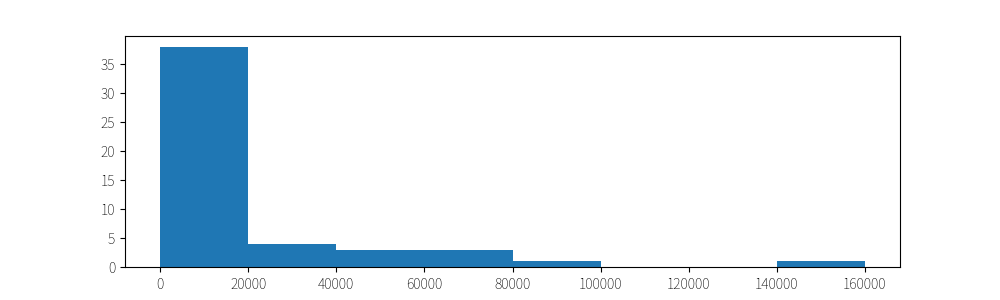

(array([38.,  4.,  3.,  1.,  0.,  0.,  1.]),
 array([     0,  20000,  40000,  80000, 100000, 120000, 140000, 160000]),
 <a list of 7 Patch objects>)

In [18]:
fig = plt.figure(figsize=(10,3))
plt.hist(all_jp_desc["各地の感染者数合計"],bins=[0,20000,40000,80000,100000,120000,140000,160000])

<IPython.core.display.Javascript object>


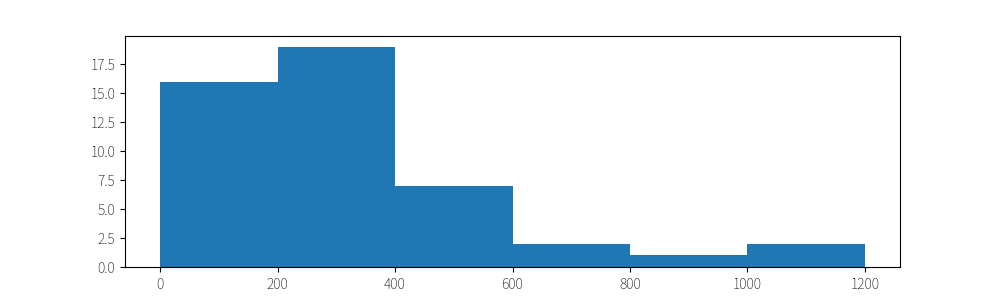

(array([16., 19.,  7.,  2.,  1.,  2.]),
 array([   0,  200,  400,  600,  800, 1000, 1200]),
 <a list of 6 Patch objects>)

In [19]:
fig = plt.figure(figsize=(10,3))
plt.hist(all_jp_desc["10万人当たりの感染者数"],bins=[0,200,400,600,800,1000,1200])
